In [1]:
import pandas as pd 
from rdkit import Chem
from path import Path

import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from metrics_batch_created import calculate_uniqueness, calculate_novelty, calculate_validity, plot_molecule_sizes, plot_atom_distribution_dict, calculate_scores, plot_scores
from DataPipeline.preprocessing import smiles_to_torch_geometric, torch_geometric_to_networkx, plot_graph

In [15]:
zinc_path = Path('rndm_zinc_drugs_clean_3.csv')
zinc_df = pd.read_csv(zinc_path)

mol_path = Path('generated_molecules_1500_charged_3_embedding_post_treatment.csv')
mol_df = pd.read_csv(mol_path)

bismol_path = Path('generated_molecules_1500_charged_3_embedding.csv')
bismol_df = pd.read_csv(bismol_path)

In [3]:
mol_list = mol_df['SMILES'].to_list()

In [4]:
def convert_canonical_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(mol)

zinc_df['canonical_smiles'] = zinc_df['smiles'].apply(convert_canonical_smiles)

In [5]:
validity, valid_molecules = calculate_validity(mol_list)

[15:17:01] non-ring atom 0 marked aromatic
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 11 12 20 21 23 25
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 16 18
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 1 2 16
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 22 23 24
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 10 11 12 13 14 16
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 12
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 27
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 4 8 9 10 18 19 22
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 27 28 29
[15:17:01] Can't kekulize mol.  Unkekulized atoms: 5 18 19 20 22 23 25
[15:17:01] non-ring atom 0 marked aromatic
[15:17:01] Can't kekuli

In [6]:
validity

0.9606666666666667

In [7]:
uniqueness, unique_molecules = calculate_uniqueness(valid_molecules)

In [8]:
uniqueness

1.0

In [13]:
novelty = calculate_novelty(unique_molecules, zinc_df['canonical_smiles'].to_list())

100%|██████████| 1441/1441 [00:04<00:00, 319.17it/s]


In [16]:
calculate_novelty(unique_molecules, bismol_df['SMILES'].to_list())

100%|██████████| 1441/1441 [00:00<00:00, 120297.60it/s]


0.06453851492019436

In [14]:
novelty

1.0

In [17]:
scores = calculate_scores(valid_molecules)

In [12]:
scores_zinc = calculate_scores(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

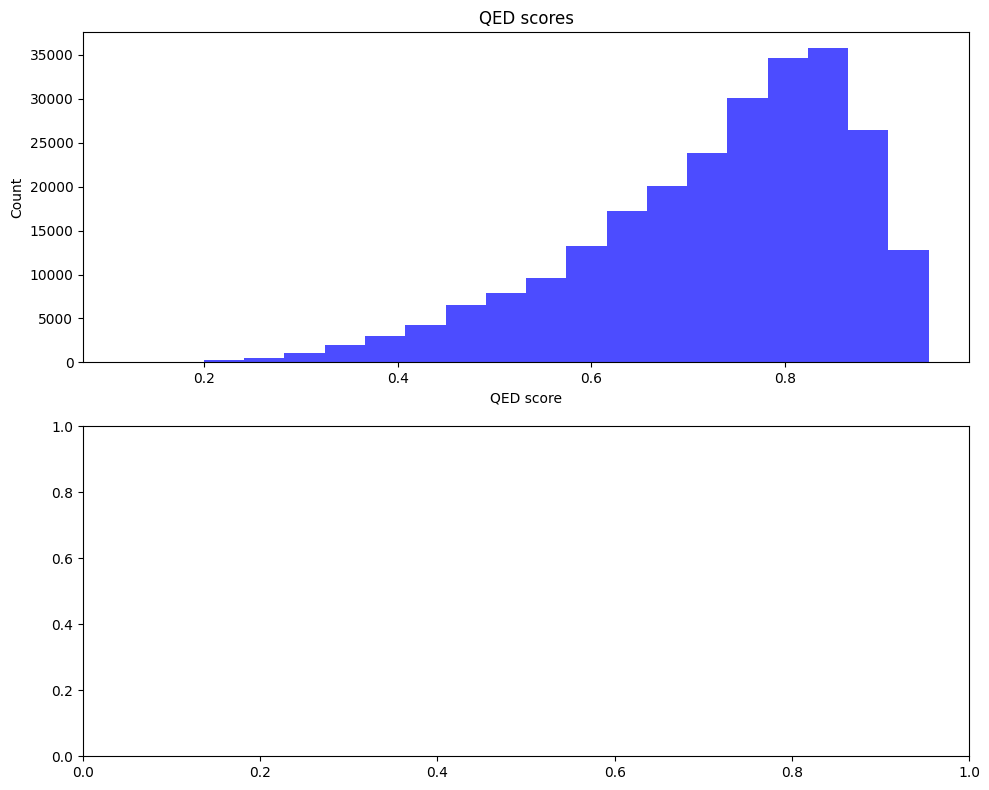

In [ ]:
plot_scores(scores_zinc)

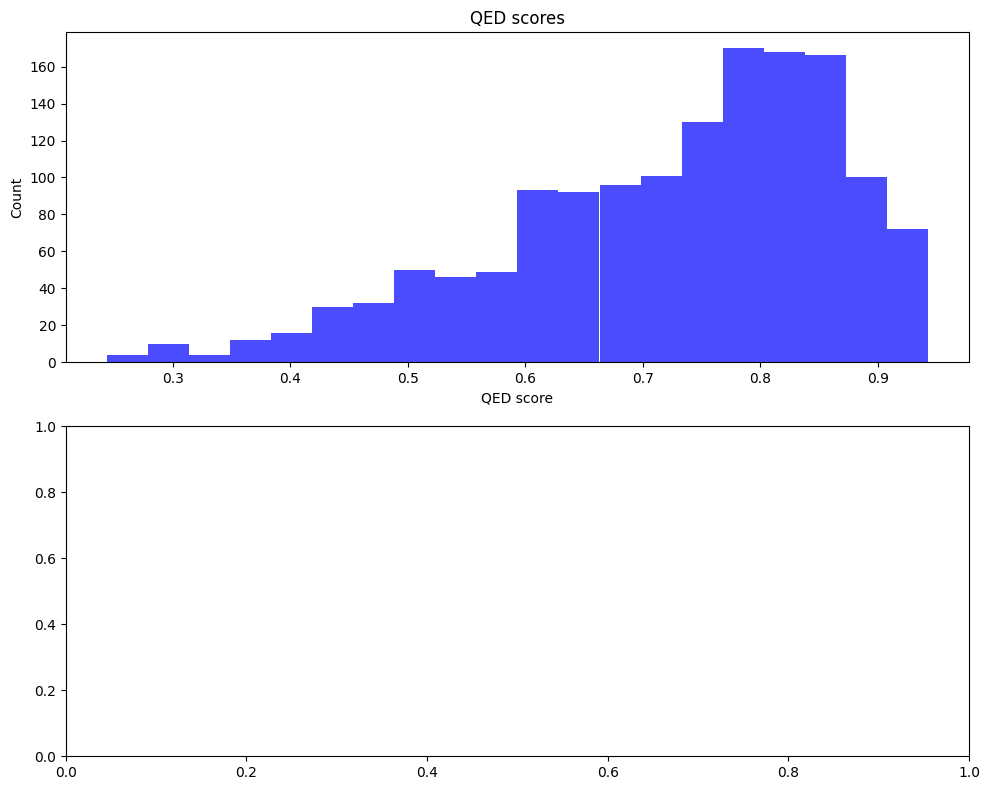

In [18]:
plot_scores(scores)

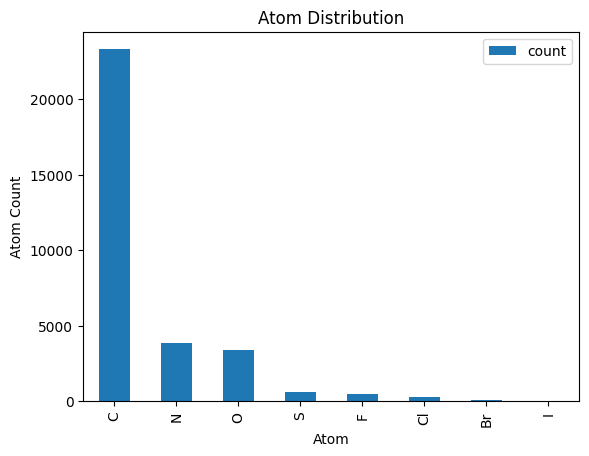

In [19]:
plot_atom_distribution_dict(valid_molecules)

In [20]:
plot_atom_distribution_dict(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

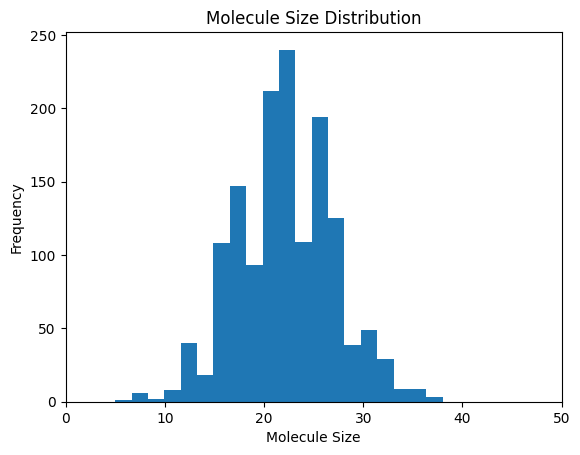

In [21]:
plot_molecule_sizes(valid_molecules)

In [22]:
def get_cycle_lengths(smiles):
    mol = Chem.MolFromSmiles(smiles)
    cycle_lengths = [len(cycle) for cycle in Chem.GetSymmSSSR(mol)]
    return cycle_lengths


df_valid = pd.DataFrame(valid_molecules, columns=['SMILES'])

df_valid['CycleLengths'] = df_valid['SMILES'].apply(get_cycle_lengths)


In [23]:
import matplotlib.pyplot as plt

# Plot histograms for cycle length in different rows of the same figure
def plot_histograms(data):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs[0, 0].hist(data['CycleLengths'].apply(lambda x: x.count(3)), bins=20)
    axs[0, 0].set_title('Cycle Length 3')
    axs[0, 1].hist(data['CycleLengths'].apply(lambda x: x.count(4)), bins=20)
    axs[0, 1].set_title('Cycle Length 4')
    axs[1, 0].hist(data['CycleLengths'].apply(lambda x: x.count(5)), bins=20)
    axs[1, 0].set_title('Cycle Length 5')
    axs[1, 1].hist(data['CycleLengths'].apply(lambda x: x.count(6)), bins=20)
    axs[1, 1].set_title('Cycle Length 6')
    axs[2, 0].hist(data['CycleLengths'].apply(lambda x: x.count(7)), bins=20)
    axs[2, 0].set_title('Cycle Length 7')
    axs[2, 1].hist(data['CycleLengths'].apply(lambda x: x.count(8)), bins=20)
    axs[2, 1].set_title('Cycle Length 8')
    plt.show()

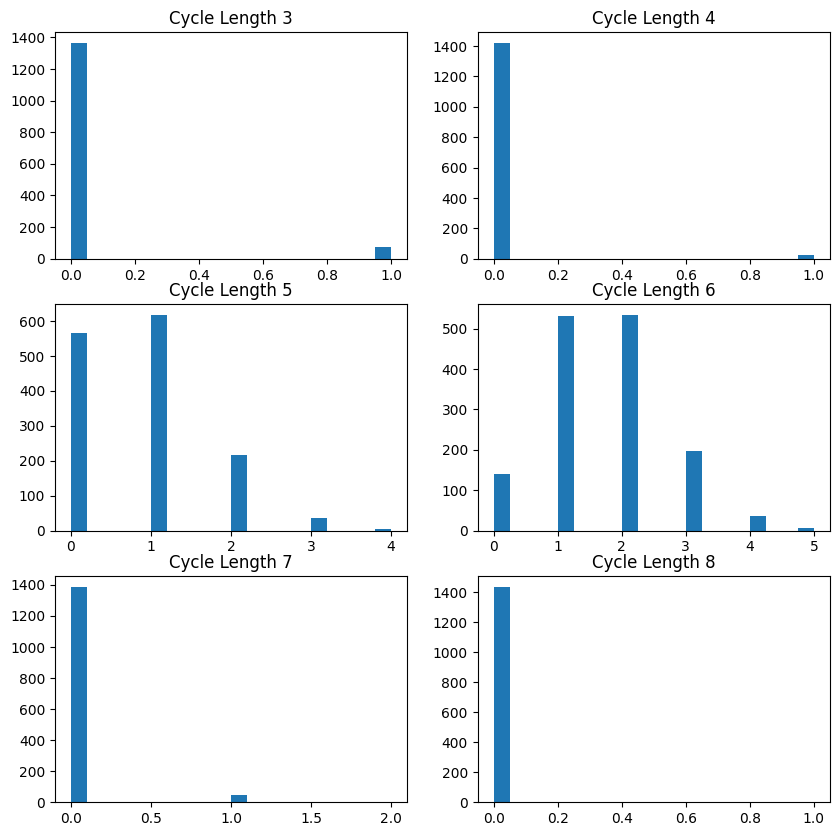

In [24]:
plot_histograms(df_valid)

In [25]:
from collections import Counter

def count_bonding_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Counter([bond.GetBondType() for bond in mol.GetBonds()])

<Axes: >

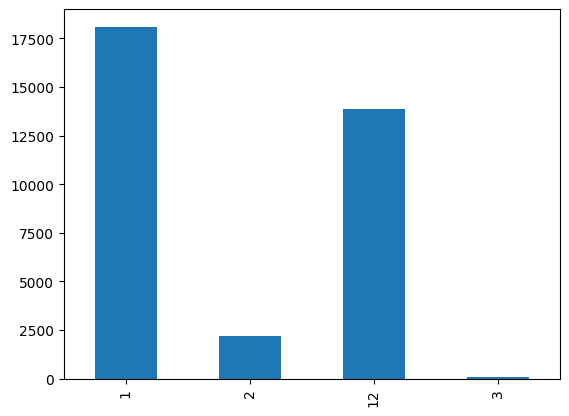

In [26]:
df_valid['BondingTypes'] = df_valid['SMILES'].apply(count_bonding_types)

#Plot 

df_valid['BondingTypes'].apply(pd.Series).fillna(0).astype(int).sum().plot.bar()